In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OneHotEncoder 
from sklearn import tree

In [6]:
df = pd.read_csv('tennis.csv') 
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [7]:
X =df[['outlook','temp','humidity','windy']] 
y = df[['play']] 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size =0.3) 

In [9]:
ohe = OneHotEncoder() 
ohe.fit(X_train) 
X_train_ohe = ohe.transform(X_train).toarray() 
ohe_df = pd.DataFrame(X_train_ohe,columns=ohe.get_feature_names_out(X_train.columns))  
ohe_df.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [12]:
clf = DecisionTreeClassifier(criterion = 'entropy') 
clf.fit(X_train_ohe,y_train) 

DecisionTreeClassifier(criterion='entropy')

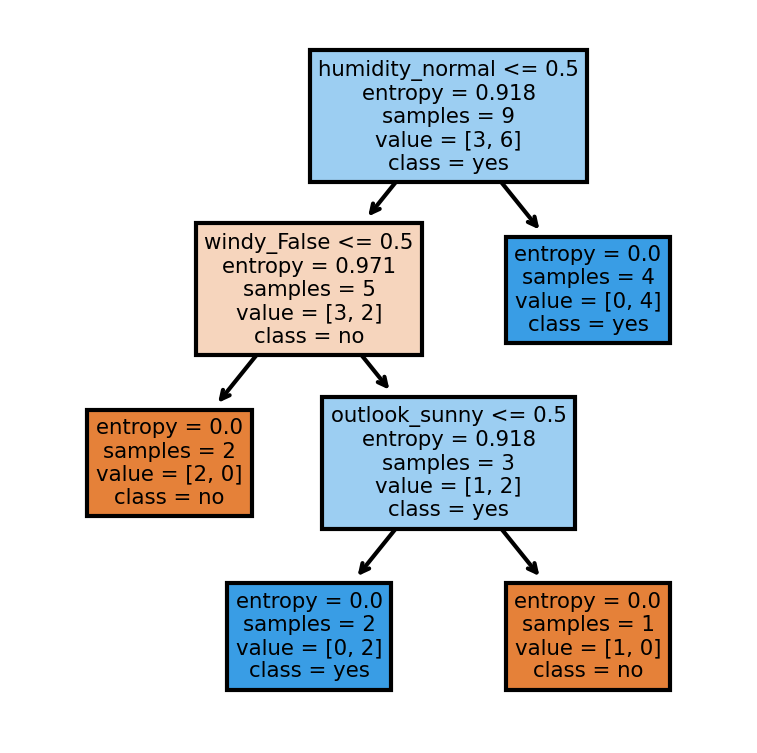

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3),dpi = 300) 
tree.plot_tree(clf, 
               feature_names = ohe_df.columns,
               class_names = np.unique(y).astype('str'),
               filled = True )
plt.show()

In [16]:
X_test_ohe = ohe.transform(X_test) 
y_pred = clf.predict(X_test_ohe) 
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.6
